In [1]:
import sys
sys.path.append('/media/data/hungnt/work/Datasets/BTMD/Code/src')

import os
import torch
import pandas as pd
import seaborn as sns
import config
import pyreadr
import numpy as np
import pickle
import matplotlib.pyplot as plt
import utils

from sklearn.metrics import confusion_matrix
from Models.MLP.Model import DNAMLP
from utils import get_int_label


In [2]:
cfg = config.config_dict

In [14]:
def plot_confusion_matrix(confusion_matrix, class_names, figsize = (15,10), fontsize=12):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (100,70).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=sorted(class_names), columns=sorted(class_names),
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt = "d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
def load_probs (outer_fold):
    cfg = config.config_dict
    PROBS_PICKLES_DIR = cfg['PROBS_PICKLES_DIR']
    probs_pickle_filename = f'{outer_fold}_probs.pickle'
    labels_pickle_filename = f'{outer_fold}_labels.pickle'
    probs_pickle_filepath = os.path.join(PROBS_PICKLES_DIR, probs_pickle_filename)
    labels_pickle_filepath = os.path.join(PROBS_PICKLES_DIR, labels_pickle_filename)
    
    with open(probs_pickle_filepath, 'rb') as handle:
        probs = pickle.load(handle)
    with open(labels_pickle_filepath, 'rb') as handle:
        labels = pickle.load(handle)
    return probs, labels

In [5]:
label_codes = {label:get_int_label(label) for label in utils.group_names}
print(label_codes)

{'Embryonal': 1, 'Glioblastoma': 4, 'Glio-neuronal': 3, 'Sella': 13, 'Ependymal': 2, 'Other glioma': 10, 'Nerve': 9, 'Pineal': 11, 'Mesenchymal': 8, 'Melanocytic': 7, 'Plexus': 12, 'Glioma IDH': 5, 'Haematopoietic': 6, 'Control': 0}


In [6]:
label_codes.keys(), label_codes.values()

(dict_keys(['Embryonal', 'Glioblastoma', 'Glio-neuronal', 'Sella', 'Ependymal', 'Other glioma', 'Nerve', 'Pineal', 'Mesenchymal', 'Melanocytic', 'Plexus', 'Glioma IDH', 'Haematopoietic', 'Control']),
 dict_values([1, 4, 3, 13, 2, 10, 9, 11, 8, 7, 12, 5, 6, 0]))

In [13]:
probs, labels = load_probs('1.0')
preds_int = np.argmax(probs, axis = 1)
print(f'{labels[0:3]}...{labels[-3:]}')
print(preds_int, type(preds_int), len(preds_int), len(probs))
labels_int = np.array([label_codes[label] for label in labels])
print(labels_int, type(labels_int), len(labels_int), len(labels))
cfs = confusion_matrix(labels_int, preds_int)
cfs, cfs.shape
print(pd.Series(preds_int).value_counts())

['Glioblastoma', 'Glioblastoma', 'Control']...['Glio-neuronal', 'Embryonal', 'Glioblastoma']
[4 4 0 ... 3 1 4] <class 'numpy.ndarray'> 2204 2204
[4 4 0 ... 3 1 4] <class 'numpy.ndarray'> 2204 2204
1     484
4     334
2     270
10    268
5     163
3     147
13    134
8     131
0      88
12     65
11     61
9      22
7      21
6      16
dtype: int64


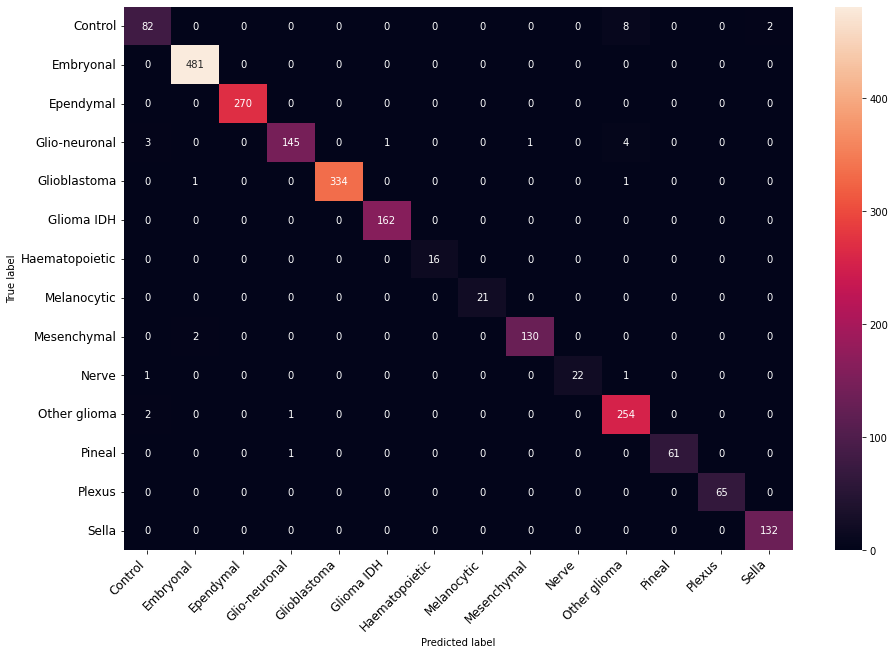

In [15]:
plot_confusion_matrix(cfs, label_codes.keys())